In [13]:
from tensorflow import keras
#   a) Check help() on keras.datasets.mnist.load_data and read to find out how to unpack the data properly.

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [14]:

#   b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean? #(Antal bilder, höjd, bredd)
# X_träningsdatan har 60.000 bilder, varje bild är 28 x 28 pixlar (gråskala).
# y_träningsdatan har 60.000 etiketter (siffror 0-9, en label(sanna svaret) per träningsbild. Tex kan siffran vara = 5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [15]:
#   c) How many images are there in X_train? #60.000
len(X_train)

60000

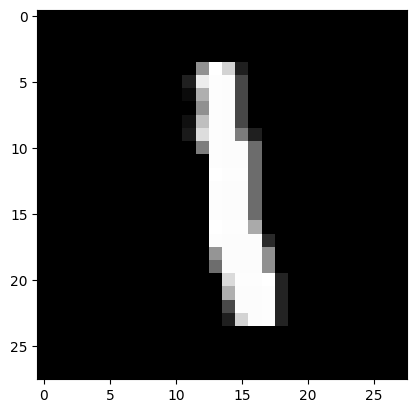

In [16]:
#   d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? 
# Plot this image using plt.imshow() and set cmap to "gray" to get the correct representation of the grayscale image.
X_train[6].min(), X_train[6].max() # dessa siffror representerar pixelintensitet i gråskala. 0=Svart, 255 = Vitt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(X_train[6], cmap="gray")

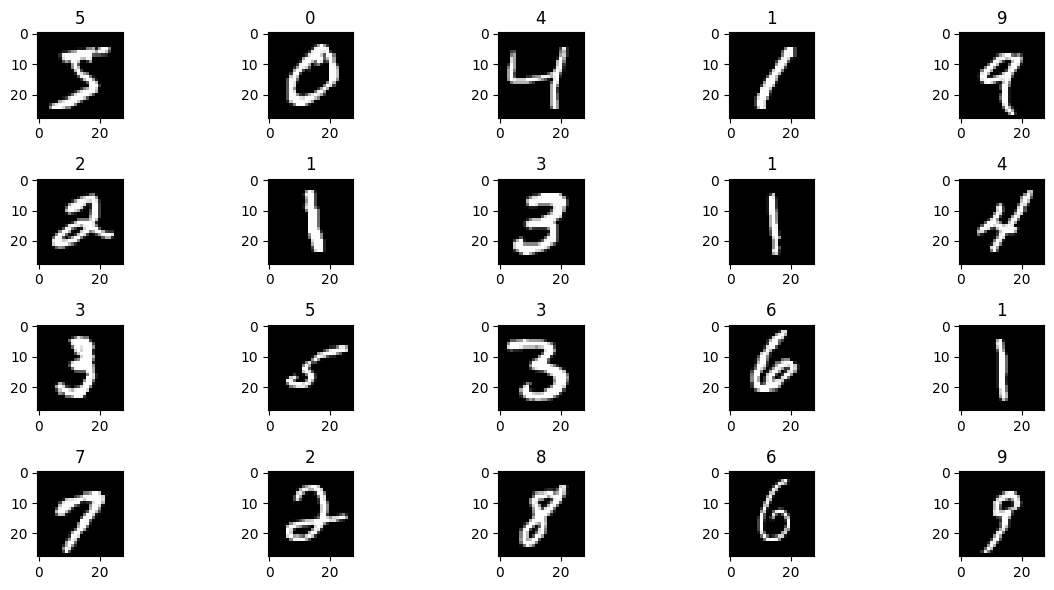

In [17]:
#   e) Plot 20 sample images.
plt.figure(figsize=(12,6)) #bredd x höjd

for i in range(20): 
    plt.subplot(4,5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i])
    
plt.tight_layout()
plt.show()


In [18]:

#   f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). 
# However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes.
X_train.shape, X_test.shape, y_test.shape #((60000, 28, 28), (10000, 28, 28), (10000,))
X_train_flat = X_train.reshape(X_train.shape[0], -1) # resultat blir: 
X_test_flat = X_test.reshape(X_test.shape[0], -1) # resultat blir: 
X_train_flat.shape, X_test_flat.shape # ((60000, 784), (10000, 784))

((60000, 784), (10000, 784))

In [19]:

#   g) Do train|val|test split and 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_test = X_test_flat

X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((48000, 784), (48000,), (10000, 784), (10000,), (12000, 784), (12000,))

In [20]:
# scale the data using feature standardization. Check mean and standard deviation of the training and test data.
scaler = StandardScaler()

scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_val = scaler.transform(X_val)


In [21]:
print(f"{scaled_X_train.mean() = }")
print(f"{scaled_X_train.std() = }\n")

print(f"{scaled_X_test.mean() = }")
print(f"{scaled_X_test.std() = }\n")

print(f"{scaled_X_val.mean() = }")
print(f"{scaled_X_val.std() = }")

scaled_X_train.mean() = np.float64(-1.498423456364837e-18)
scaled_X_train.std() = np.float64(0.9536449944870391)

scaled_X_test.mean() = np.float64(0.0021683162686691876)
scaled_X_test.std() = np.float64(0.9513586500194601)

scaled_X_val.mean() = np.float64(-0.0012910404589343712)
scaled_X_val.std() = np.float64(1.0823403757868508)


In [ ]:
# #   h) Train the models for a set of k -values using the training data and make predictions on validation data. 
# # Based on your plot, which k do you choose?
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
error_list = []
for k in range(1,15):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_val)
    error = 1-accuracy_score(y_val, y_pred)
    error_list.append(error)

# # Plot the validation accuracy against different k -values. 



2

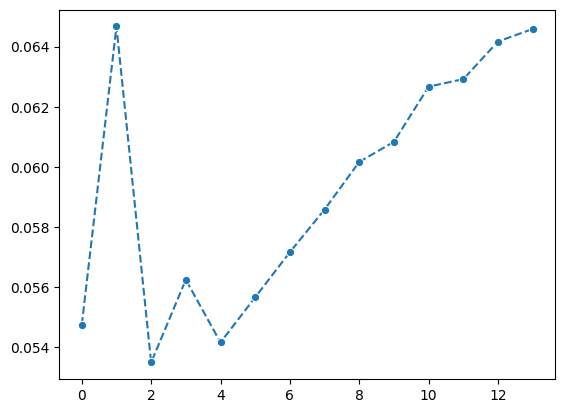

In [36]:
import seaborn as sns
sns.lineplot(error_list, marker="o", linestyle="--")

best_index = min(error_list)
best_k = error_list.index(best_index)
best_k

In [ ]:
#   i) Now train the KNN model using the k value you have chosen. Don't waste any training samples, so use all the original 60000 of the X_train for training the KNN model. 

import numpy as np
X_train_full = np.concatenate([X_train, X_val])
y_train_full = np.concatenate([y_train, y_val])
X_train_full.shape #X_val.shape

(60000, 784)

In [45]:

# Predict on the test data.

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_full, y_train_full)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



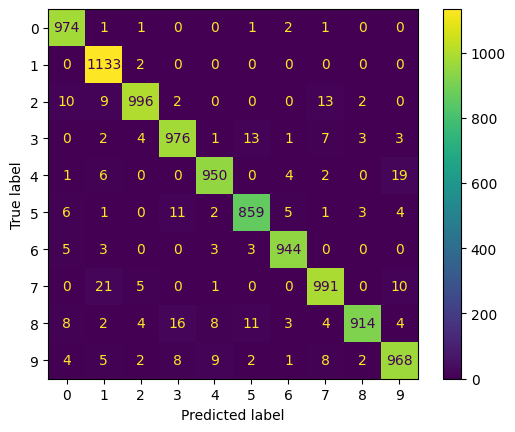

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
#   j) Do a classification report and based on the report, can you figure out which number had highest proportions of false negatives. 
# False negative in this case means that the true label is i but the model predicted not i . 8 har sämst recall, 1, 7 och 9 sämst precision, 3,5,7-9 likvärdigt sämst f1 
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#   k) Plot a confusion matrix, does this confirm your answer in a? Oklart
ConfusionMatrixDisplay(cm).plot();

In [ ]:
#   l) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?
# 8 hade mest missclassifications. 8 kanske kan förväxlas med både 0, 6 och 9? 
misses = cm.sum(axis=1) - np.diag(cm)

for i, m in enumerate(misses):
    print(f"Siffra: {i} = Antal: {m}")


Siffra: 0 = Antal: 6
Siffra: 1 = Antal: 2
Siffra: 2 = Antal: 36
Siffra: 3 = Antal: 34
Siffra: 4 = Antal: 32
Siffra: 5 = Antal: 33
Siffra: 6 = Antal: 14
Siffra: 7 = Antal: 37
Siffra: 8 = Antal: 60
Siffra: 9 = Antal: 41
